# Calculate Density Profile
## By Joe Laforet Jr.

### This notebook takes in a .pdb trajectory and calculates a density profile of the specified residue throughout the Z-Coordinate. This is for specific use in the Ice Cream Sandwich simulations.

In [1]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [7]:
if line.startswith(("ATOM" or "HETATM")):
        atomType = line[0:6]
        atomSerialNumber = line[6:11]
        atomName = line[12:16]
        resName = line[17:20]
        chain = line[21]
        resNumber = line[22:26]
        coorX = line[30:38]
        coorY = line[38:46]
        coorZ = line[46:54]
        print("resName: {} Z-Coord: {}".format(resName, coorZ))

NameError: name 'line' is not defined

In [2]:
def plot_density_profile(fname, resname, z_min, z_max):
    pdbTraj = open(fname, 'r')
    pdbTraj_line = pdbTraj.readlines()

    curResNumber = 1
    wantResName = resname
    coords = []

    mean_zvals = []
    min_z = 0
    max_z = 0
    total_frames = 500
    
    all_mean_zvals = []
    all_inds = []
    all_freqs = []
    
    cur_frame = 0
    for line in pdbTraj_line:
        #rint("reading line")
        #print(line.startswith("HETATM"))
        if line.startswith(("MODEL")):      
            if(cur_frame != 0):
                mean_zvals = np.array(mean_zvals)[(~np.isnan(mean_zvals))]
                all_mean_zvals.append(mean_zvals)
                
            cur_frame +=1
            mean_zvals = []
            continue
            
        if line.startswith(("HETATM")):
            resName = line[17:20]
            resNumber = int(line[22:26])
            coorZ = float(line[46:54])
            
            if(coorZ <= min_z):
                min_z = coorZ
            
            if(coorZ >= max_z):
                max_z = coorZ
            
            #print(resName)
            #print(resNumber)
            if((resNumber == curResNumber) and (wantResName == resName)):
                #print("{},".format(coorZ))
                #print("resName: {} resNumber: {} Z-Coord: {}".format(resName, resNumber, coorZ))
                coords.append(coorZ)
        
            if((resNumber != curResNumber) and (wantResName == resName)):
                #print("resName: {} resNumber: {} Z-Coord: {}".format(resName, resNumber, coorZ))
                mean_Z = np.mean(np.array(coords))
                #print(mean_Z)
                mean_zvals.append(mean_Z)
                #print("Mean Z-Coor: {}".format(mean_Z))
                coords = []
            
        
        
                curResNumber = resNumber
            
        #mean_zvals = np.array(mean_zvals)[(~np.isnan(mean_zvals))]
        
    
    bins = np.arange(z_min, z_max, 3)
    #bins = np.array([0, 25, 55, 105, 135, 185, 215, 265, 300])
    #print(min_z)
    #print(max_z)
    
    
    for i in range(len(all_mean_zvals)):
        #print(all_mean_zvals)
        all_inds.append(np.digitize(all_mean_zvals[i], bins))
        all_freqs.append( np.bincount(all_inds[i], minlength = len(bins)))
    
    #inds = np.digitize(mean_zvals, bins)
    #freqs = np.bincount(inds, minlength = len(bins))
    
    final_freqs = np.mean(all_freqs, axis=0)
    
    #print(len(mean_zvals))
    #print(len(inds))
    
    return bins, final_freqs
    


In [199]:
def plot_density_profile(fname, resname, z_min, z_max):
    pdbTraj = open(fname, 'r')
    pdbTraj_line = pdbTraj.readlines()

    curResNumber = 1
    wantResName = resname
    coords = []

    mean_zvals = []
    min_z = 0
    max_z = 0
    
    for line in pdbTraj_line:
        #rint("reading line")
        #print(line.startswith("HETATM"))
        #if line.startswith(("MODEL")):
        
            if line.startswith(("HETATM")):
                resName = line[17:20]
                resNumber = int(line[22:26])
                coorZ = float(line[46:54])
            
                if(coorZ <= min_z):
                    min_z = coorZ
            
                if(coorZ >= max_z):
                    max_z = coorZ
            
            #print(resName)
            #print(resNumber)
                if((resNumber == curResNumber) and (wantResName == resName)):
                #print("{},".format(coorZ))
                #print("resName: {} resNumber: {} Z-Coord: {}".format(resName, resNumber, coorZ))
                    coords.append(coorZ)
        
                if((resNumber != curResNumber) and (wantResName == resName)):
                    print("resName: {} resNumber: {} Z-Coord: {}".format(resName, resNumber, coorZ))
                    mean_Z = np.mean(np.array(coords))
                    mean_zvals.append(mean_Z)
                #print("Mean Z-Coor: {}".format(mean_Z))
                    coords = []
            
        
        
                curResNumber = resNumber
            
    mean_zvals = np.array(mean_zvals)[(~np.isnan(mean_zvals))]
    
    bins = np.arange(z_min, z_max, 3)
    #bins = np.array([0, 25, 55, 105, 135, 185, 215, 265, 300])
    #print(min_z)
    #print(max_z)
    inds = np.digitize(mean_zvals, bins)
    freqs = np.bincount(inds, minlength = len(bins))
    #fig, ax = plt.subplots(num=1, clear=True)
    #ax.scatter(mean_zvals, inds, label="Data")
    #ax.grid(True)
    #ax.legend(loc="best")
    #fig.tight_layout()
    #plt.show()
    #print(len(mean_zvals))
    #print(len(inds))
    
    return bins, freqs
    


In [18]:
def make_plot(x_vals, y_vals, names, sizes, masses, percent):
    
    fig, ax = plt.subplots(num=1, clear = False)
    
    for i in range(len(x_vals)):
        print("Plotting {}".format(names[i]))
        ax.scatter(x_vals[i], np.array(y_vals[i]) * masses[i], label = names[i], s=sizes[i])
        
    ax.grid(True)
    ax.legend(loc='best')
    ax.set(xlabel = 'Z-Coordinate (Angstrom)', ylabel = 'Mass Density')
    fig.set_size_inches(18.5, 10.5)
    fig.tight_layout()
    plt.savefig("{}_{}_{}_DensityProfile.png".format(percent, names[2],names[1]), dpi = 300)
    plt.show()
    

In [4]:
plt.rcParams.update({'font.size': 20})

## Cell Below used to make plots in bulk.

In [7]:
os.getcwd()

'/work/jrl78/Nanoparticle Slab/volRatio/30%'

In [6]:
os.chdir('30%')

In [9]:
import glob

In [12]:
files = glob.glob("openmm*.pdb")

In [13]:
files[0]

'openmm_NPT_1000ns_slab_2x_Sorafenib_EvansBlue_75_12_4x4x21nm.pdb'

In [14]:
excip = files[0].split("_")[6]

'EvansBlue'

In [15]:
excip_names = [x.split("_")[6] for x in glob.glob("openmm*.pdb")]
excip_names

['EvansBlue',
 'Ursodiol',
 'FolicAcid',
 'Glycyrrhizin',
 'Indomethacin',
 'CongoRed',
 'Budesonide']

In [22]:
files

['openmm_NPT_1000ns_slab_2x_Sorafenib_EvansBlue_75_12_4x4x21nm.pdb',
 'openmm_NPT_1000ns_slab_2x_Sorafenib_Ursodiol_75_17_4x4x21nm.pdb',
 'openmm_NPT_1000ns_slab_2x_Sorafenib_FolicAcid_75_20_4x4x21nm.pdb',
 'openmm_NPT_1000ns_slab_2x_Sorafenib_Glycyrrhizin_75_10_4x4x21nm.pdb',
 'openmm_NPT_1000ns_slab_2x_Sorafenib_Indomethacin_75_24_4x4x21nm.pdb',
 'openmm_NPT_1000ns_slab_2x_Sorafenib_CongoRed_75_14_4x4x21nm.pdb',
 'openmm_NPT_1000ns_slab_2x_Sorafenib_Budesonide_75_17_4x4x21nm.pdb']

In [51]:
os.chdir("../50%")

In [52]:
os.getcwd()

'/work/jrl78/Nanoparticle Slab/volRatio/50%'

In [53]:
files = sorted(glob.glob("openmm*.pdb"))

excip_names = [x.split("_")[6] for x in files]
excip_resNames = ['ZOB','ZCR', 'EVB', 'FOL',  'ZLB',  'ZEU', 'ZJA', ]
excip_Masses = [430.534, 696.665, 872.9, 441.4, 822.94,  357.787, 392.56]

In [54]:
files

['openmm_NPT_1000ns_slab_2x_Sorafenib_Budesonide_75_29_4x4x21nm.pdb',
 'openmm_NPT_1000ns_slab_2x_Sorafenib_CongoRed_75_23_4x4x21nm.pdb',
 'openmm_NPT_1000ns_slab_2x_Sorafenib_EvansBlue_75_19_4x4x21nm.pdb',
 'openmm_NPT_1000ns_slab_2x_Sorafenib_FolicAcid_75_33_4x4x21nm.pdb',
 'openmm_NPT_1000ns_slab_2x_Sorafenib_Glycyrrhizin_75_16_4x4x21nm.pdb',
 'openmm_NPT_1000ns_slab_2x_Sorafenib_Indomethacin_75_40_4x4x21nm.pdb']

Plotting Water
Plotting Budesonide
Plotting Sorafenib


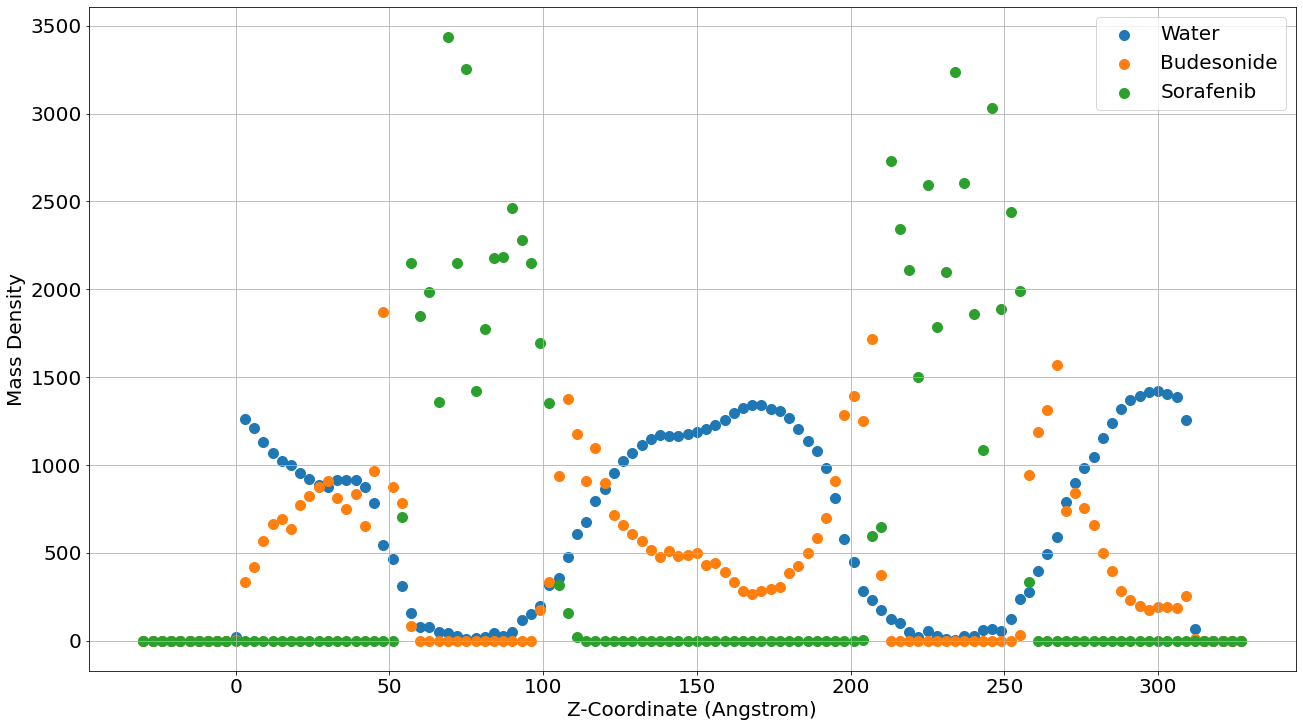

Plotting Water
Plotting CongoRed
Plotting Sorafenib


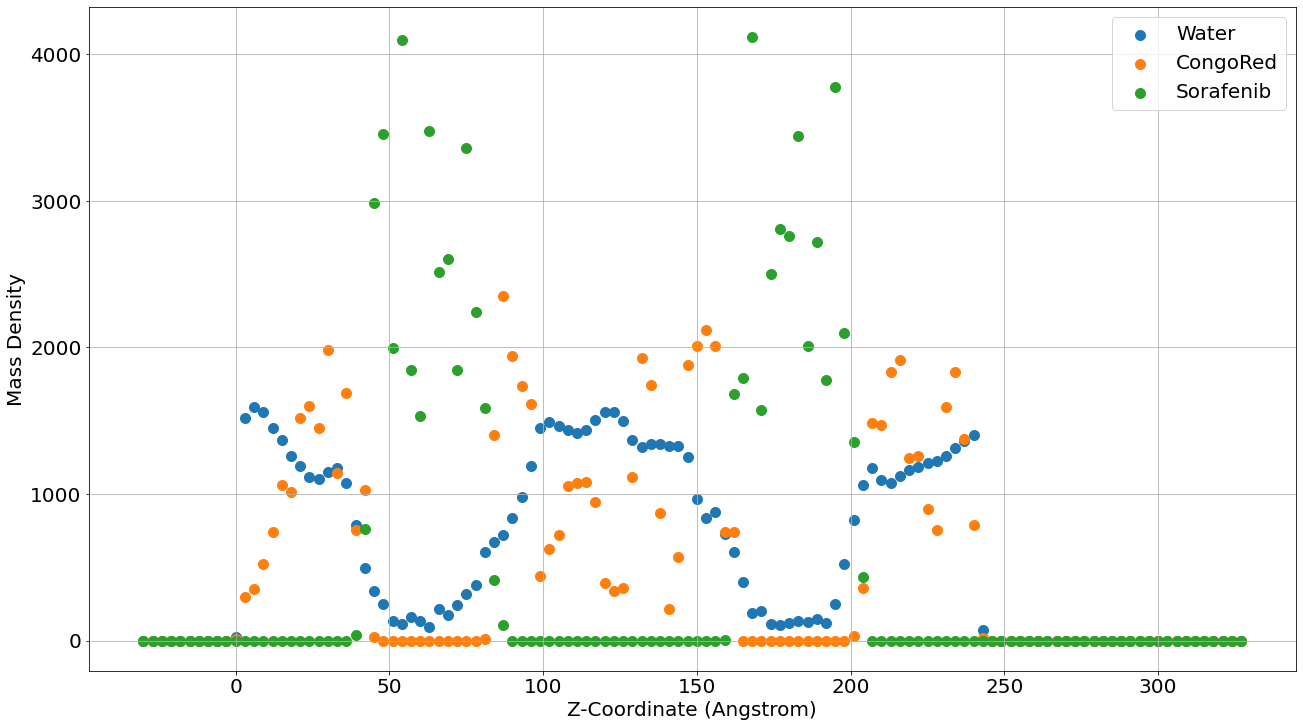

Plotting Water
Plotting EvansBlue
Plotting Sorafenib


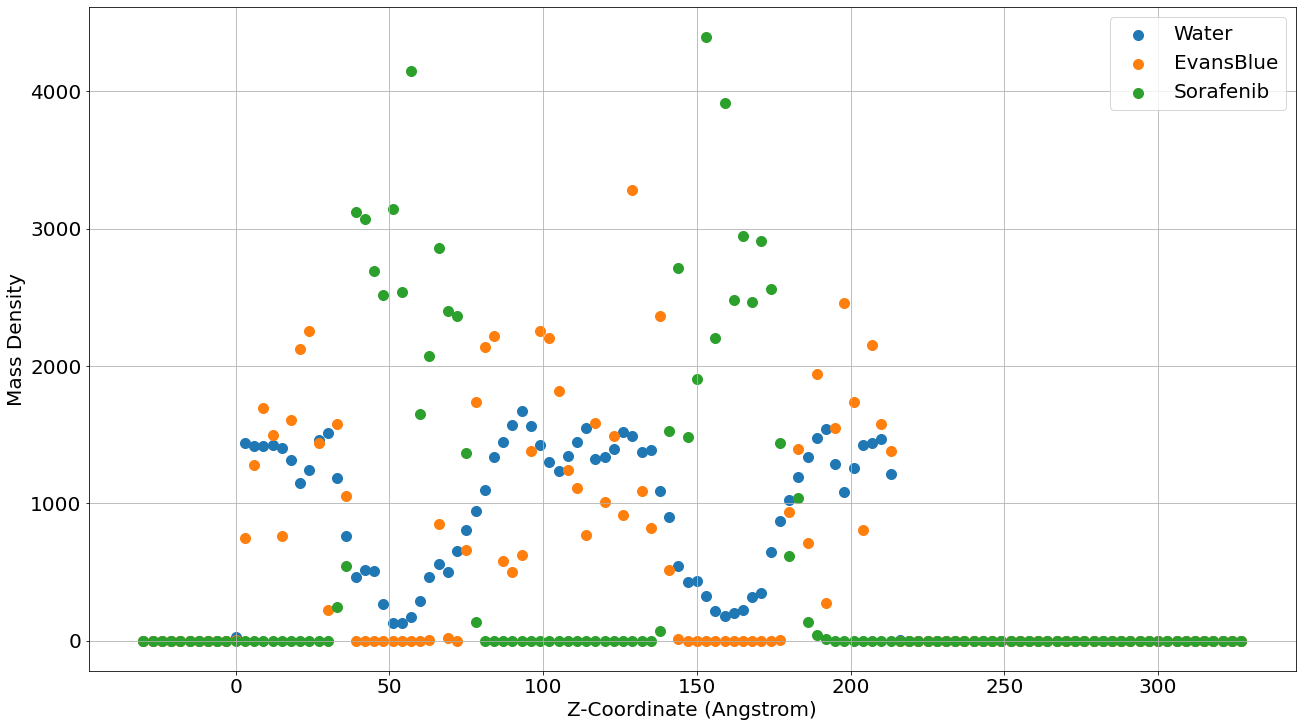

Plotting Water
Plotting FolicAcid
Plotting Sorafenib


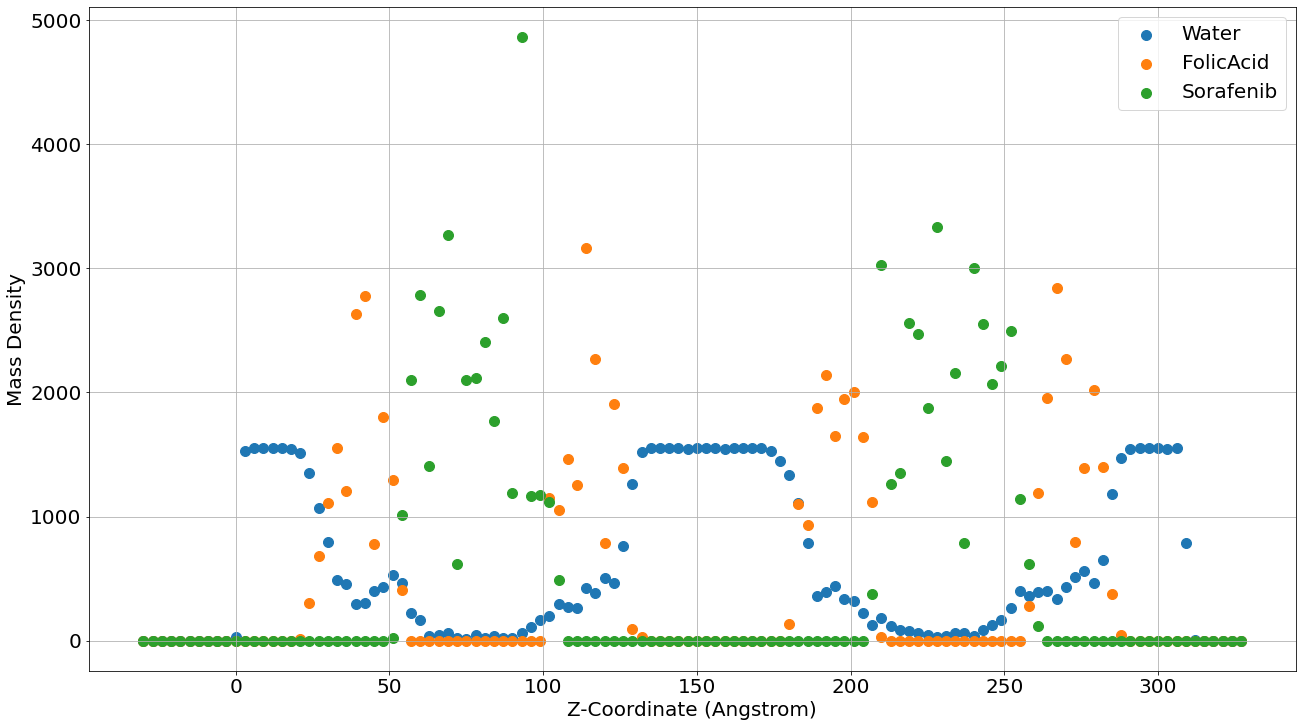

Plotting Water
Plotting Glycyrrhizin
Plotting Sorafenib


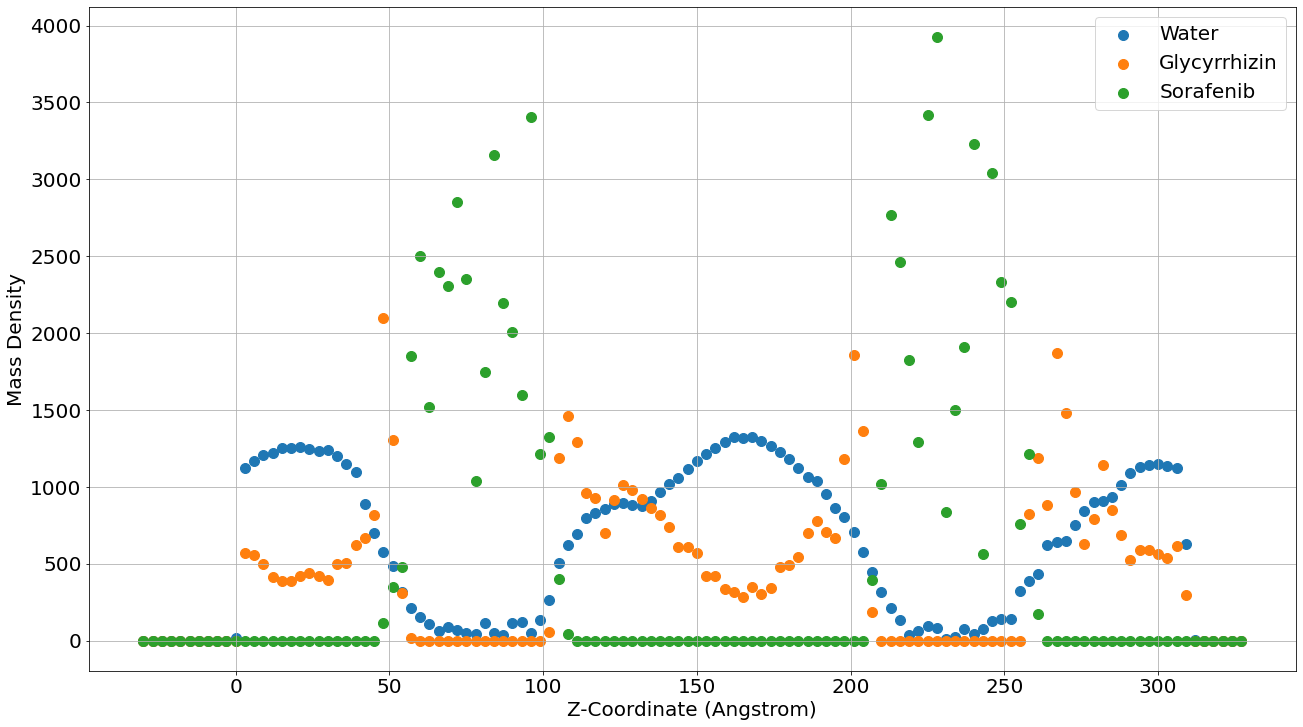

Plotting Water
Plotting Indomethacin
Plotting Sorafenib


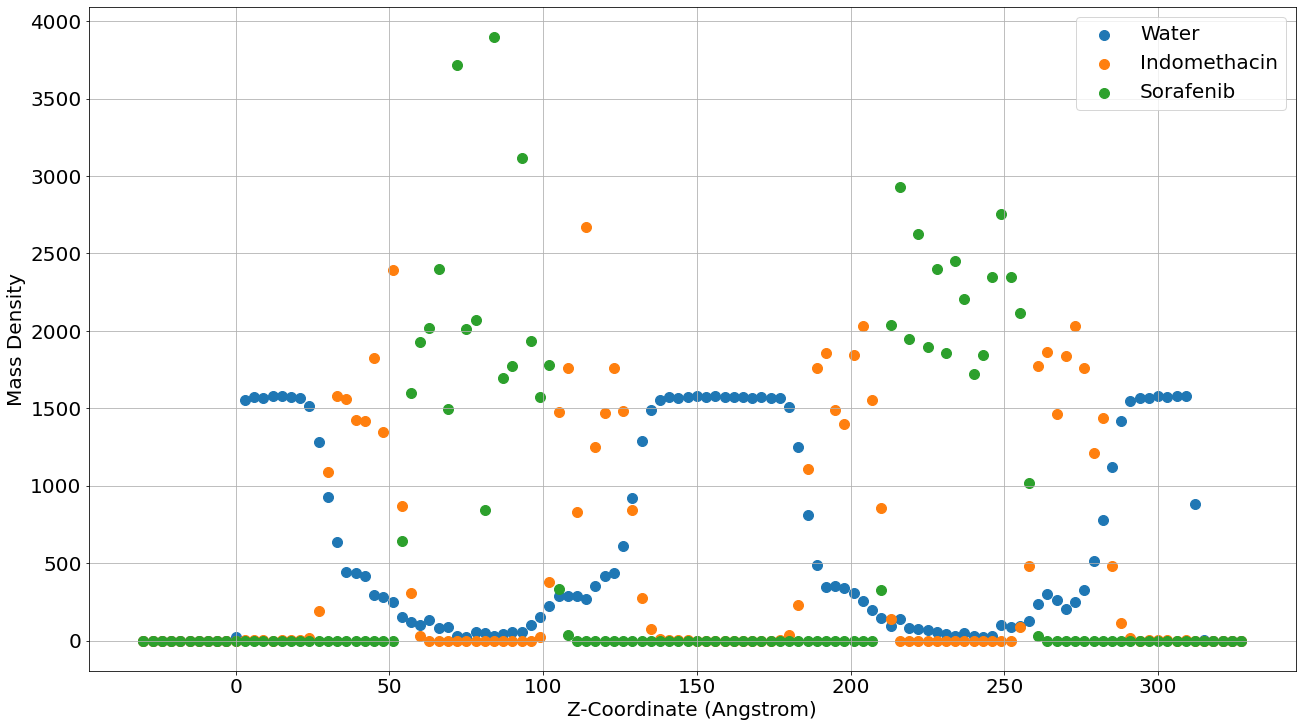

Job's Done!


In [55]:
#excip = 'Ursodiol'
#excip_res = 'ZJA'
#excip_mass = 392.56
percent = '50%'
for i in range(len(excip_names)):
    
    excip = excip_names[i]
    excip_res = excip_resNames[i]
    excip_mass = excip_Masses[i]

    waterx2, waterY = plot_density_profile(files[i], 'HOH', -30, 330)
    excipx2, excipY = plot_density_profile(files[i], '{}'.format(excip_res), -30, 330)
    drugx2, drugY = plot_density_profile(files[i].format(excip), 'ZAB', -30, 330)

    vals = [waterx2, excipx2, drugx2]
    yvals = [waterY, excipY, drugY]

    names = ['Water', "{}".format(excip), 'Sorafenib']
    masses = [18.02, excip_mass, 464.83]
    sizes = [100, 100, 100]
    try:
        make_plot(vals, yvals, names, sizes, masses, percent)
    except:
        continue

print("Job's Done!")

In [8]:
waterx2, waterY = plot_density_profile('full_1uS_Sorafenib_FolicAcid_2xSlab.pdb', 'FOL', -10, 320)

In [9]:
waterY

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.00801603e-03, 1.80360721e-02,
       5.01002004e-01, 1.72144289e+00, 2.26052104e+00, 2.50300601e+00,
       3.11422846e+00, 7.78356713e+00, 3.27855711e+00, 2.38877756e+00,
       9.27855711e-01, 4.98997996e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.44889780e+00, 3.77354709e+00,
       2.65731463e+00, 3.39679359e+00, 6.41883768e+00, 2.54909820e+00,
       3.15030060e+00, 1.60320641e+00, 2.00400802e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

Plotting Water
Plotting Folic Acid
Plotting Sorafenib


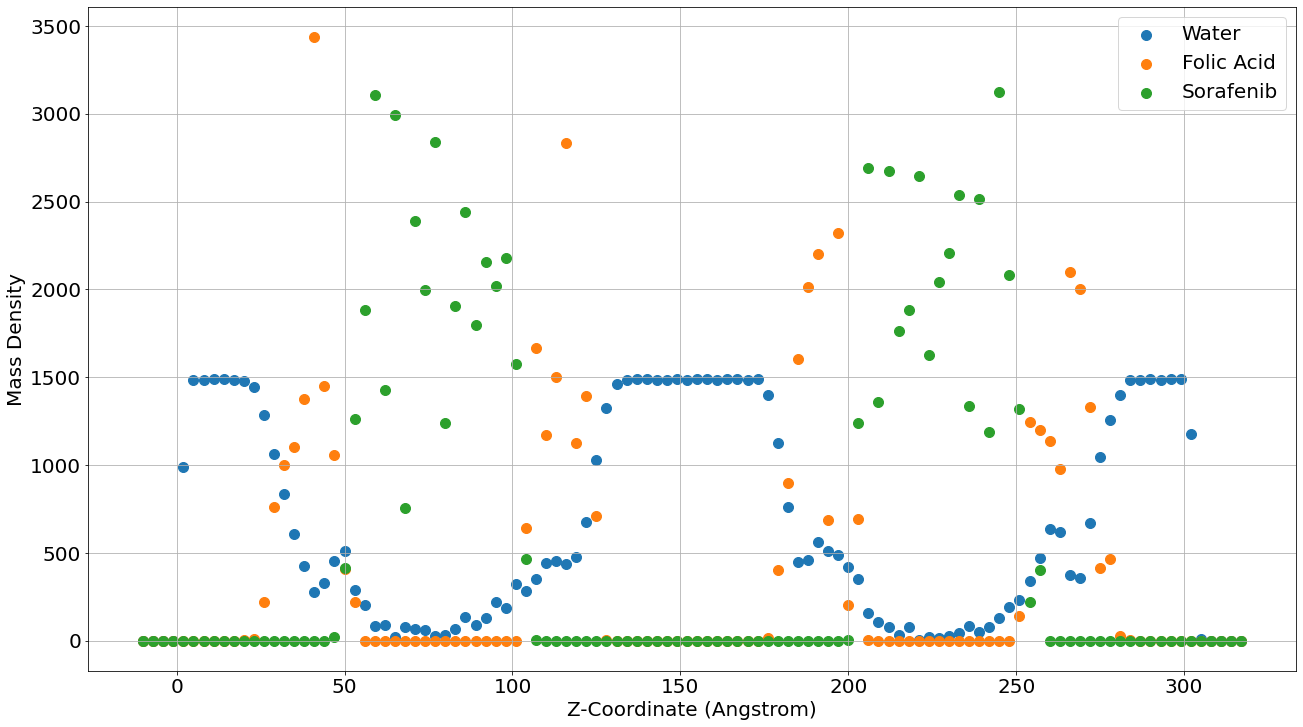

In [14]:
waterx2, waterY = plot_density_profile('full_1uS_Sorafenib_FolicAcid_2xSlab.pdb', 'HOH', -10, 320)
folx2, folY = plot_density_profile('full_1uS_Sorafenib_FolicAcid_2xSlab.pdb', 'FOL', -10, 320)
drugx2, drugY = plot_density_profile('full_1uS_Sorafenib_FolicAcid_2xSlab.pdb', 'ZAB', -10, 320)

vals = [waterx2, folx2, drugx2]
yvals = [waterY, folY, drugY]

names = ['Water', "Folic Acid", 'Sorafenib']
masses = [18.02, 441.4, 464.83]
sizes = [100, 100, 100]

make_plot(vals, yvals, names, sizes, masses)


Plotting Water
Plotting Ursodiol
Plotting Sorafenib


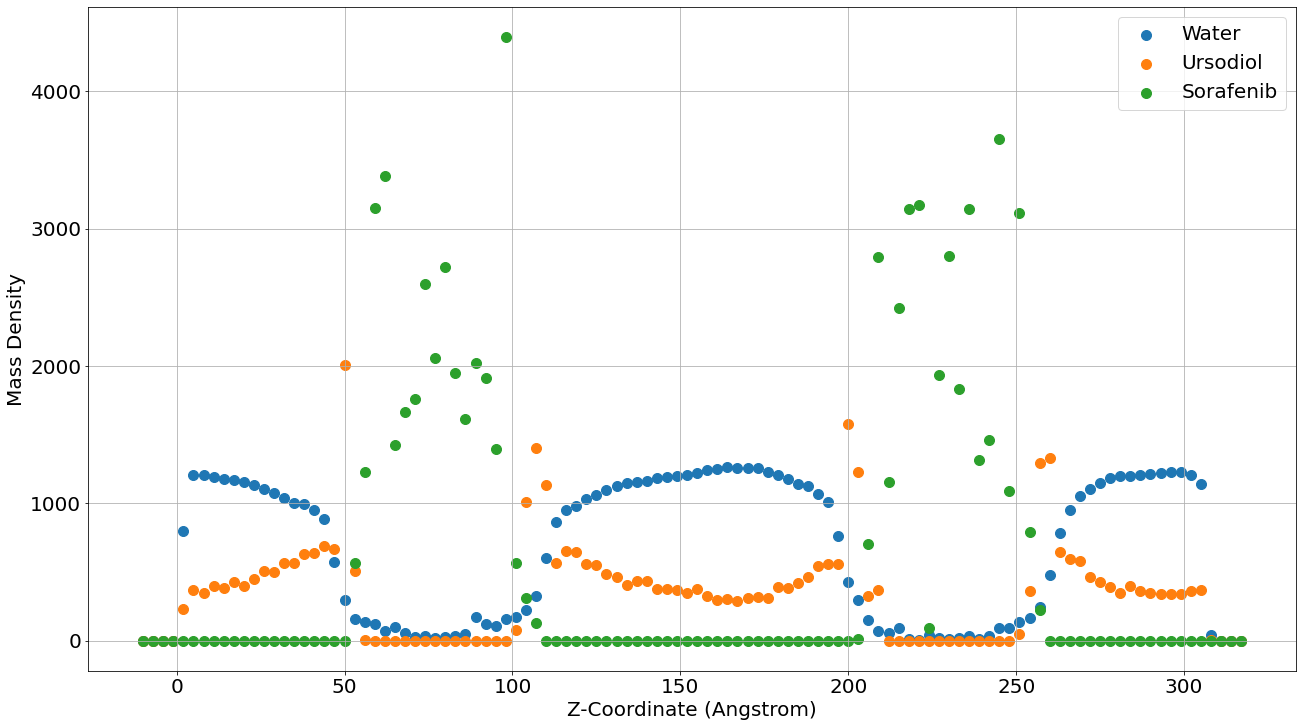

In [221]:
waterx2, waterY = plot_density_profile('full_1uS_Sorafenib_Ursodiol_2xSlab.pdb', 'HOH', -10, 320)
ursox2, ursoY = plot_density_profile('full_1uS_Sorafenib_Ursodiol_2xSlab.pdb', 'ZJA', -10, 320)
drugx2, drugY = plot_density_profile('full_1uS_Sorafenib_Ursodiol_2xSlab.pdb', 'ZAB', -10, 320)

vals = [waterx2, ursox2, drugx2]
yvals = [waterY, ursoY, drugY]

names = ['Water', "Ursodiol", 'Sorafenib']
masses = [18.02, 392.56, 464.83]
sizes = [100, 100, 100]

make_plot(vals, yvals, names, sizes, masses)


Plotting Water
Plotting Indomethacin
Plotting Sorafenib


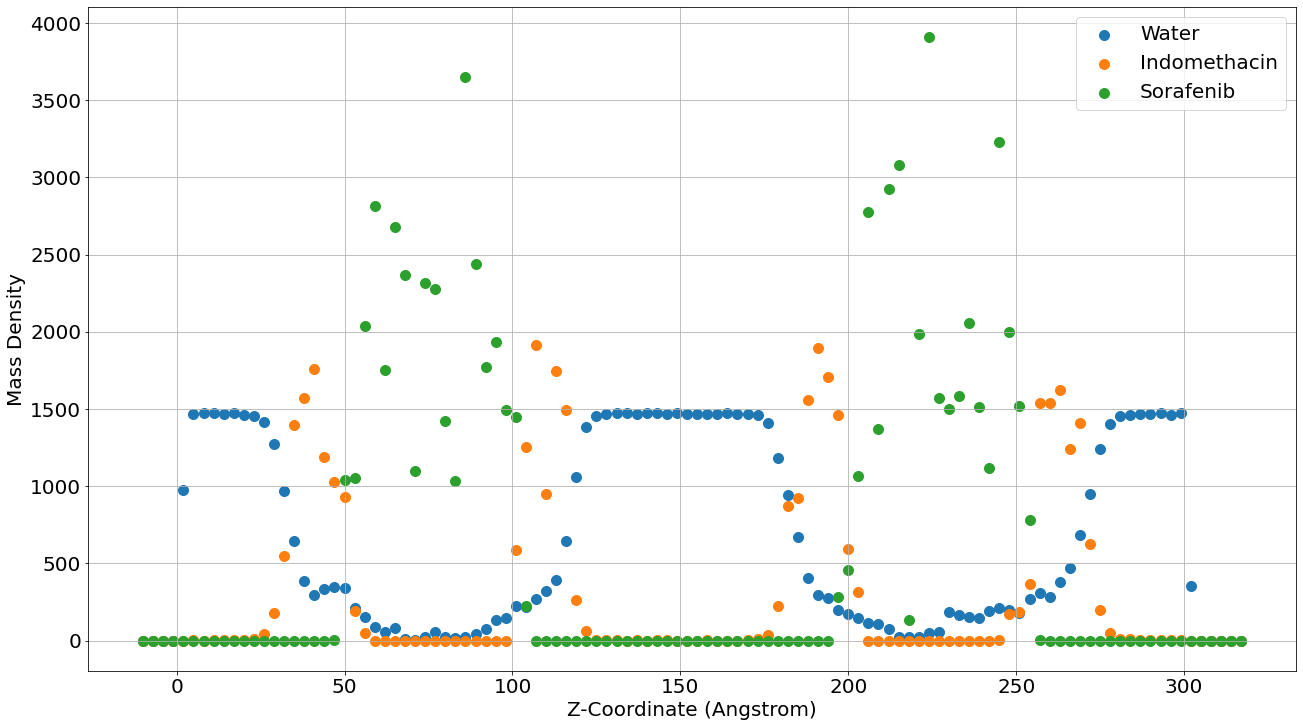

In [223]:
waterx2, waterY = plot_density_profile('full_1uS_Sorafenib_Indomethacin_2xSlab.pdb', 'HOH', -10, 320)
indox2, indoY = plot_density_profile('full_1uS_Sorafenib_Indomethacin_2xSlab.pdb', 'ZEU', -10, 320)
drugx2, drugY = plot_density_profile('full_1uS_Sorafenib_Indomethacin_2xSlab.pdb', 'ZAB', -10, 320)

vals = [waterx2, indox2, drugx2]
yvals = [waterY, indoY, drugY]

names = ['Water', "Indomethacin", 'Sorafenib']
masses = [18.02, 357.79, 464.83]
sizes = [100, 100, 100]

make_plot(vals, yvals, names, sizes, masses)


Plotting Water
Plotting Glycyrrhizin
Plotting Sorafenib


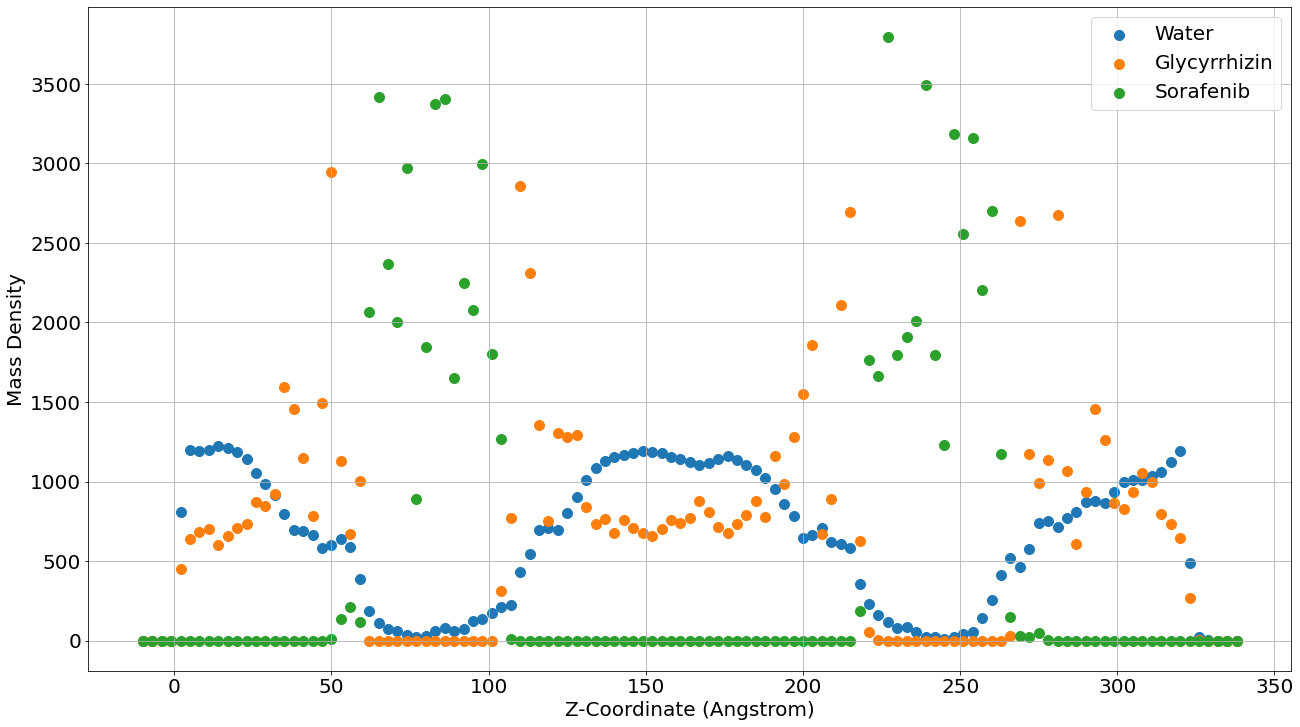

In [224]:
waterx2, waterY = plot_density_profile('full_1uS_Sorafenib_Glycyrrhizin_2xSlab.pdb', 'HOH', -10, 340)
glyx2, glyY = plot_density_profile('full_1uS_Sorafenib_Glycyrrhizin_2xSlab.pdb', 'ZLB', -10, 340)
drugx2, drugY = plot_density_profile('full_1uS_Sorafenib_Glycyrrhizin_2xSlab.pdb', 'ZAB', -10, 340)

vals = [waterx2, glyx2, drugx2]
yvals = [waterY, glyY, drugY]

names = ['Water', "Glycyrrhizin", 'Sorafenib']
masses = [18.02, 822.94, 464.83]
sizes = [100, 100, 100]
make_plot(vals, yvals, names, sizes, masses)


Plotting Water
Plotting CongoRed
Plotting Sorafenib


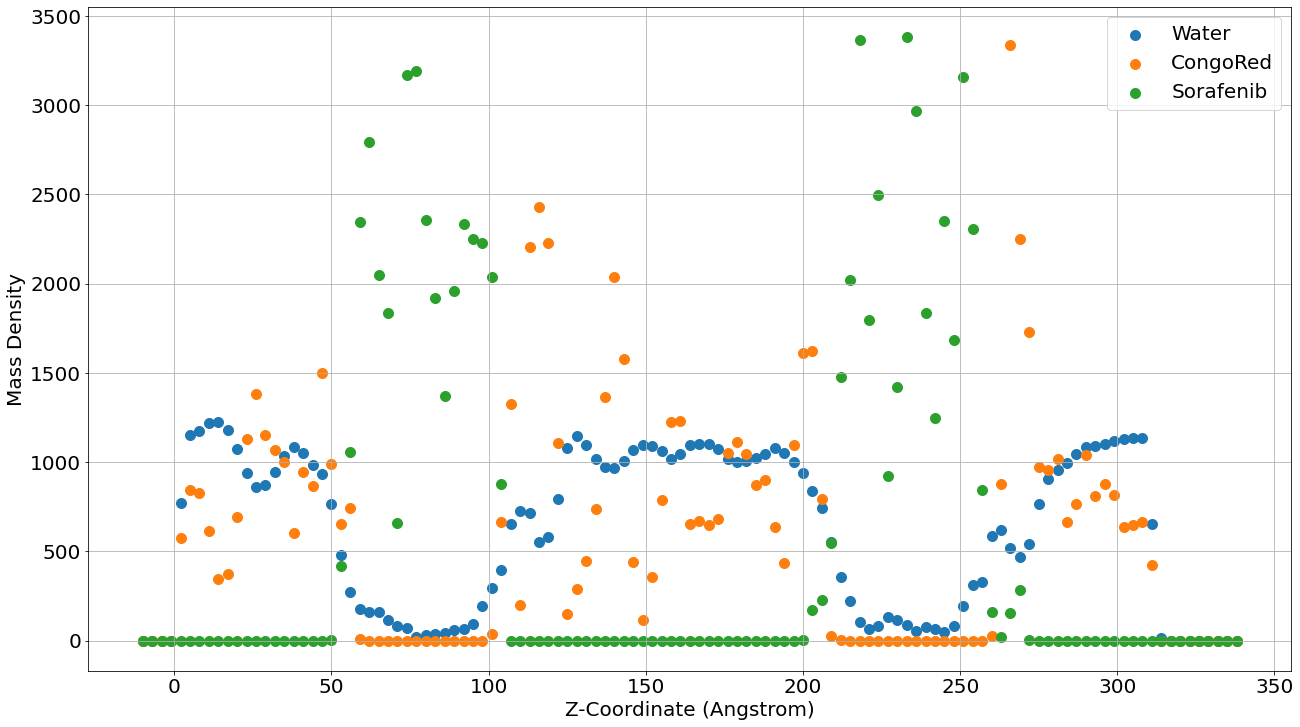

In [225]:
waterx2, waterY = plot_density_profile('full_1uS_Sorafenib_CongoRed_2xSlab.pdb', 'HOH', -10, 340)
crx2, crY = plot_density_profile('full_1uS_Sorafenib_CongoRed_2xSlab.pdb', 'ZCR', -10, 340)
drugx2, drugY = plot_density_profile('full_1uS_Sorafenib_CongoRed_2xSlab.pdb', 'ZAB', -10, 340)

vals = [waterx2, crx2, drugx2]
yvals = [waterY, crY, drugY]

names = ['Water', "CongoRed", 'Sorafenib']
masses = [18.02, 696.66, 464.83]
sizes = [100, 100, 100]
make_plot(vals, yvals, names, sizes, masses)


Plotting Water
Plotting Folic Acid
Plotting Sorafenib


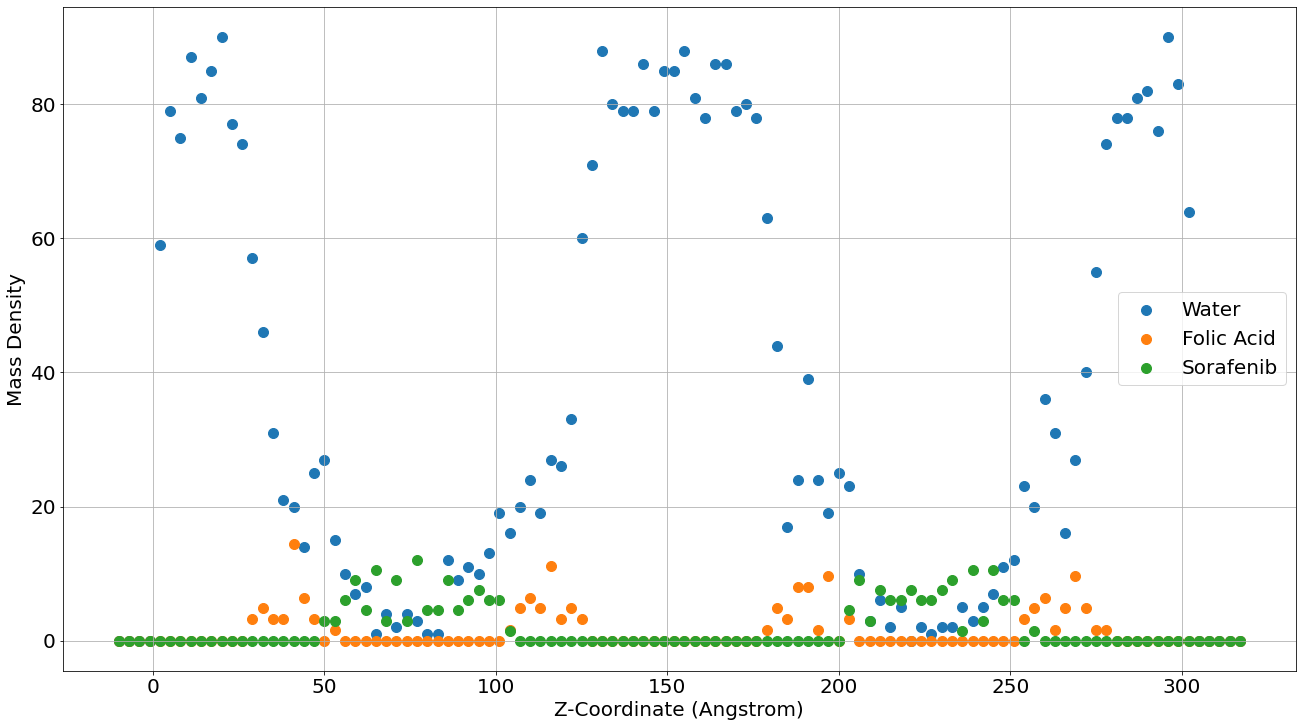

In [190]:
waterx2, waterY = plot_density_profile('1uS_Sorafenib_FolicAcid_2xSlab.pdb', 'HOH', -10, 320)
folx2, folY = plot_density_profile('1uS_Sorafenib_FolicAcid_2xSlab.pdb', 'FOL', -10, 320)
drugx2, drugY = plot_density_profile('1uS_Sorafenib_FolicAcid_2xSlab.pdb', 'ZAB', -10, 320)

vals = [waterx2, folx2, drugx2]
yvals = [waterY, folY, drugY]

names = ['Water', "Folic Acid", 'Sorafenib']
masses = [1, 1.6, 1.5]
sizes = [100, 100, 100]

make_plot(vals, yvals, names, sizes, masses)


In [14]:
waterx2 = plot_density_profile('1uS_Sorafenib_FolicAcid_1xSlab.pdb', 'ZAB')

In [61]:
pdbTraj = open('1uS_Sorafenib_FolicAcid_2xSlab.pdb', 'r')
pdbTraj_line = pdbTraj.readlines()

curResNumber = 1
wantResName = "ZAB"
coords = []

mean_zvals = []

for line in pdbTraj_line:
    #rint("reading line")
    #print(line.startswith("HETATM"))
    if line.startswith(("HETATM")):
        resName = line[17:20]
        resNumber = int(line[22:26])
        coorZ = float(line[46:54])
        #print(resName)
        #print(resNumber)
        if((resNumber == curResNumber) and (wantResName == resName)):
            #print("{},".format(coorZ))
            #print("resName: {} resNumber: {} Z-Coord: {}".format(resName, resNumber, coorZ))
            coords.append(coorZ)
        
        if((resNumber != curResNumber) and (wantResName == resName)):
            #print("resName: {} resNumber: {} Z-Coord: {}".format(resName, resNumber, coorZ))
            mean_Z = np.mean(np.array(coords))
            mean_zvals.append(mean_Z)
            #print("Mean Z-Coor: {}".format(mean_Z))
            coords = []
            
        
        
        curResNumber = resNumber
        


C:\Users\joela\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\joela\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
fig, ax = plt.subplots(num=fig_num, clear=True)
ax.scatter(x, y, "ko", label="Data")
ax.grid(True)
ax.legend(loc="best")
fig.tight_layout()

In [62]:
import matplotlib.pyplot as plt

In [63]:
mean_zvals = np.array(mean_zvals)[(~np.isnan(mean_zvals))]
mean_zvals

array([ 62.53168085,  85.80376596,  99.3113617 ,  96.88974468,
        55.77061702,  83.18925532,  56.35478723,  63.78742553,
        94.70938298,  49.73725532,  80.50880851,  95.62978723,
        74.05731915,  53.55489362,  74.60729787,  95.31112766,
        61.9026383 ,  82.39178723,  83.98287234,  93.6932766 ,
        49.95510638,  77.47044681,  54.35923404,  70.79921277,
        92.40617021,  56.91551064,  58.45476596,  85.48593617,
        63.06802128,  99.7467234 ,  99.65406383,  91.24031915,
        52.54951064,  90.80106383,  83.36110638,  58.37185106,
        59.24631915,  57.77170213,  66.72697872,  71.936     ,
        73.5243617 ,  81.71253191,  55.18729787,  74.60312766,
        60.74714894,  76.58951064,  76.88017021,  99.15906383,
        64.14006383,  97.22612766,  76.48844681,  76.78997872,
        68.61876596,  64.0572766 ,  90.99112766,  86.18748936,
        57.78129787,  52.07693617,  94.94353191,  70.91521277,
        62.36638298,  94.28546809,  85.84461702,  70.19

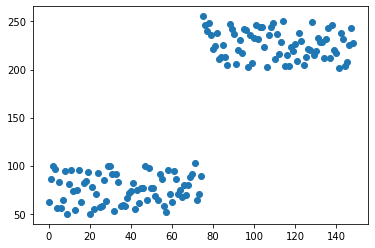

In [124]:
plt.scatter(np.arange(len(mean_zvals)), mean_zvals)
plt.xlabel = 'Z coordinate'

In [38]:
a = np.array([34.615, 35.587, 35.691, 36.49 , 30.625, 32.865, 35.797, 29.574,
       37.609, 33.404, 28.532, 36.675, 32.785, 27.754, 37.56 , 36.394,
       27.578, 28.61 , 31.287, 26.715, 30.979, 33.392, 31.439, 32.653,
       30.705, 36.68 , 29.894, 28.72 , 29.394, 28.275, 28.344, 27.33 ,
       34.991, 37.342, 36.762, 34.818, 35.558, 34.859, 31.858, 31.391,
       34.37 , 31.012, 29.876, 33.239, 29.793, 29.699, 34.816, 27.533,
       35.781, 26.347, 26.364])

In [39]:
np.mean(a)

32.16394117647059

In [ ]:
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])